In [12]:
import yfinance as yf
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

## Declaring the Date Range for our Stock Returns

In [3]:
endDate = dt.datetime.now()

startDate = endDate - dt.timedelta(days = 365*5)
endDate, startDate

(datetime.datetime(2024, 7, 25, 16, 50, 0, 414004),
 datetime.datetime(2019, 7, 27, 16, 50, 0, 414004))

## Create a list of stocks we are interested in

In [4]:
stocks = ['MSFT', 'SPY', 'QQQ']

## Download the stock data from yahoo finance

In [5]:
df = yf.download(stocks, start = startDate, end= endDate)

[*********************100%%**********************]  3 of 3 completed


In [6]:
df.head()

Price        Adj Close                               Close              \
Ticker            MSFT         QQQ         SPY        MSFT         QQQ   
Date                                                                     
2019-07-29  134.499741  188.528214  278.628815  141.029999  194.619995   
2019-07-30  133.851181  187.714523  277.944946  140.350006  193.779999   
2019-07-31  129.960098  185.118378  274.904022  136.270004  191.100006   
2019-08-01  131.667206  184.198120  272.510254  138.059998  190.149994   
2019-08-02  130.560959  181.485764  270.458344  136.899994  187.350006   

Price                         High                                 Low  \
Ticker             SPY        MSFT         QQQ         SPY        MSFT   
Date                                                                     
2019-07-29  301.459991  141.509995  195.179993  302.010010  139.369995   
2019-07-30  300.720001  141.220001  194.539993  301.170013  139.800003   
2019-07-31  297.429993  140.490005  194.429993  301.200012  135.080002   
2019-08-01  294.839996  140.940002  194.979996  300.869995  136.929993   
2019-08-02  292.619995  138.320007  188.990005  294.119995  135.259995   

Price                                     Open                          \
Ticker             QQQ         SPY        MSFT         QQQ         SPY   
Date                                                                     
2019-07-29  193.389999  300.850006  141.500000  195.110001  301.880005   
2019-07-30  192.990005  299.489990  140.139999  193.130005  299.910004   
2019-07-31  189.320007  295.200012  140.330002  194.300003  300.989990   
2019-08-01  189.229996  293.959991  137.000000  191.429993  297.600006   
2019-08-02  186.210007  290.899994  138.089996  188.720001  293.850006   

Price         Volume                       
Ticker          MSFT       QQQ        SPY  
Date                                       
2019-07-29  16605900  20451700   38126500  
2019-07-30  16846500  18705000   45849000  
2019-07-31  38598800  41627500  104245200  
2019-08-01  40557500  63251600  142646600  
2019-08-02  30791600  55214000  116749700

## Select only the 'Adj Close' Prices

In [7]:
adj_close_prices = df['Adj Close'] 

In [8]:
adj_close_prices.head()

Ticker,MSFT,QQQ,SPY
Date,,,
2019-07-29,134.499741,188.528214,278.628815
2019-07-30,133.851181,187.714523,277.944946
2019-07-31,129.960098,185.118378,274.904022
2019-08-01,131.667206,184.198120,272.510254
2019-08-02,130.560959,181.485764,270.458344


In [9]:
## Calculate the Daily Returns

In [10]:
log_returns = np.log(adj_close_prices/adj_close_prices.shift(1))
log_returns.head()

Ticker,MSFT,QQQ,SPY
Date,,,
2019-07-29,NaN,NaN,NaN
2019-07-30,-0.004834,-0.004325,-0.002457
2019-07-31,-0.029501,-0.013927,-0.011001
2019-08-01,0.013050,-0.004984,-0.008746
2019-08-02,-0.008437,-0.014835,-0.007558


## Calculate the cumulative returns

In [11]:
cumulative_log_returns = log_returns.cumsum()

<Axes: title={'center': 'Cumulative Returns'}, xlabel='Date'>

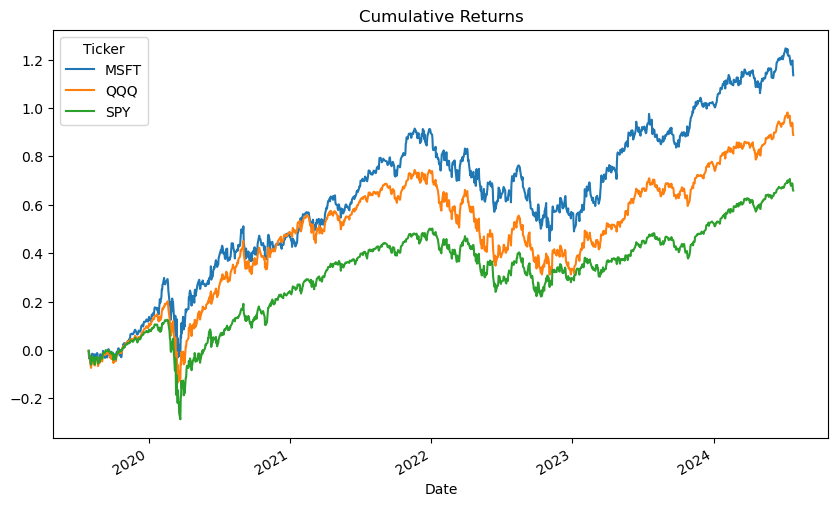

In [13]:
cumulative_log_returns.plot(title='Cumulative Returns', figsize=(10,6))